In [1]:
import random
import matplotlib.pyplot as plt

def generate_random_data(length=32):
    return [random.randint(0, 1) for _ in range(length)]

def encode_ook(data):
    encoded = [1]  # t-1 bit (always high)
    encoded.append(0)  # Start bit
    encoded.extend(data)
    encoded.append(1)  # Stop bit
    encoded.append(random.randint(0, 1))  # t+1 bit (random)
    encoded.append(random.randint(0, 1))  # t+2 bit (random)
    return encoded

def simulate_transmission(data, noise_probability=0.001):
    transmitted = encode_ook(data)
    received = []
    
    for bit in transmitted:
        received.append(bit)
    return received


# Generate a random message
message = generate_random_data()
    
# Simulate transmission
transmitted_signal = simulate_transmission(message)
    

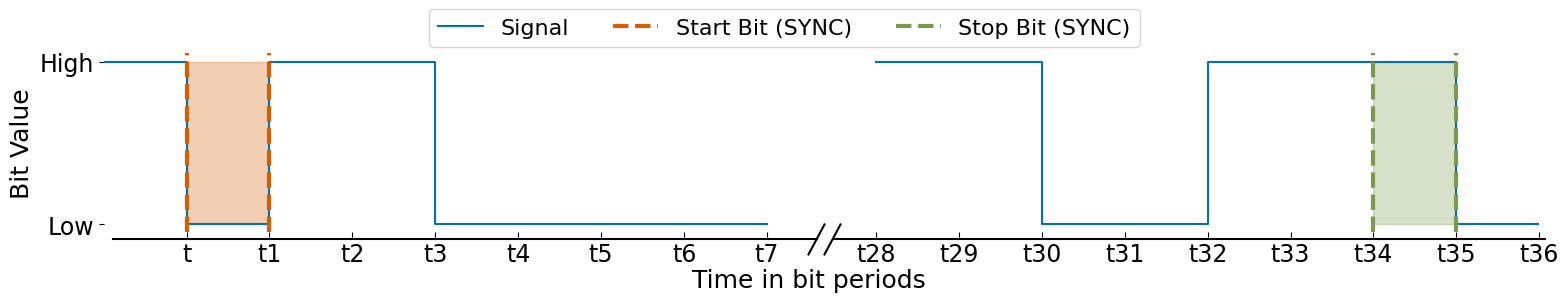

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 16})

def plot_ook_signal(signal, delta,omega):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 3), sharey=False)
    

    fig.add_artist(plt.Line2D((0.51+omega, 0.52+omega), (0.295-delta, 0.295+delta), color='k', linestyle='-', linewidth=1.5, transform=fig.transFigure))
    fig.add_artist(plt.Line2D((0.52+omega, 0.53+omega), (0.295-delta, 0.295+delta), color='k', linestyle='-', linewidth=1.5, transform=fig.transFigure))
    fig.add_artist(plt.Line2D((0.08, 0.515+omega), (0.295, 0.295), color='k', linestyle='-', linewidth=1.5, transform=fig.transFigure))
    fig.add_artist(plt.Line2D((0.525+omega, 0.975), (0.295, 0.295), color='k', linestyle='-', linewidth=1.5, transform=fig.transFigure))

    # First 8 bits (including t-1)
    ax1.set_xlabel('Time in bit periods', fontsize=18)
    ax1.set_ylabel('Bit Value', fontsize=18)
    ax1.set_ylim(-0.05, 1.05)
    ax1.set_xlim(-1, 7.5)  # Adjusted upper limit
    ax1.xaxis.set_label_coords(1.0, -0.2)
    # Plot t-1 bit and first 8 bits
    ax1.step(range(-1, 8), signal[:9], where='post', color='#0072B2', label='Signal')

    # Add vertical lines for start bit
    ax1.axvline(x=0, color='#D55E00', linestyle='--', linewidth=3, label='Start Bit (SYNC)')
    ax1.axvline(x=1, color='#D55E00', linestyle='--', linewidth=3)
    ax1.fill_between([0, 1], 0, 1, color='#D55E00', alpha=0.3)
    # Last 8 bits (including t+1)
    last_8_start = len(signal) - 9
    ax2.set_xlim(last_8_start - 0.5, len(signal)-1)  # Adjusted lower limit
    #ax2.set_xlabel('Time (bit periods)', fontsize=18)

    # Plot last 8 bits
    ax2.step(range(last_8_start, len(signal)), signal[last_8_start:], where='post', color='#0072B2')

    # Add vertical lines for stop bit
    ax2.axvline(x=len(signal)-3, color='#7C9A4D', linestyle='--', linewidth=3, label='Stop Bit (SYNC)')
    ax2.axvline(x=len(signal)-2, color='#7C9A4D', linestyle='--', linewidth=3)
    ax2.fill_between([len(signal)-3, len(signal)-2], 0, 1, color='#7C9A4D', alpha=0.3)
    
    # Set y-axis ticks and labels
    ax1.set_yticks([0, 1])
    ax1.set_yticklabels(['Low', 'High'])

    # Remove y-axis ticks and labels from ax2
    ax2.set_yticks([])
    ax2.set_yticklabels([])
    ax2.set_ylim(ax1.get_ylim())

    # Set x-axis ticks and labels
    ax1.set_xticks(range(0, 8))
    ax1.set_xticklabels([f't{i}' if i != 0 else 't' for i in range(0, 8)])
    ax2.set_xticks(range(last_8_start, len(signal)))
    ax2.set_xticklabels([f't{i}' for i in range(last_8_start, len(signal))])

    # Remove bounding boxes
    for ax in [ax1, ax2]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    # Adjust layout and add legend
    plt.tight_layout()
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize=16)

    plt.savefig('OOK_withstartandstop.svg', dpi=600, bbox_inches='tight')
    plt.show()

# The rest of your code (generate_random_data, encode_ook, simulate_transmission, and main) remains the same

plt.rcParams.update({'font.size': 17})
plot_ook_signal(transmitted_signal, 0.05,0.005)